In [1]:
#thyroid cancer  risk factor dataset

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv("movies_updated.csv")

In [34]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,"runtime,,"
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,"146.0,"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,"104.0,"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,"124.0,"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,"88.0,"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,"98.0,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Birthday Girl,R,Comedy,2001,"February 1, 2002 (United States)",6.1,25000,Jez Butterworth,Tom Butterworth,Nicole Kidman,United Kingdom,13000000,16171098.0,FilmFour,"93.0,"
3996,Human Nature,R,Comedy,2001,"September 12, 2001 (France)",6.4,18000,Michel Gondry,Charlie Kaufman,Tim Robbins,France,0,1574660.0,Fine Line Features,"96.0,"
3997,Made,R,Comedy,2001,"August 31, 2001 (United States)",6.4,18000,Jon Favreau,Jon Favreau,Vince Vaughn,United States,5000000,5480653.0,Artisan Entertainment,"95.0,"
3998,One Night at McCool's,R,Comedy,2001,"April 27, 2001 (United States)",6.1,29000,Harald Zwart,Stan Seidel,Liv Tyler,United States,18000000,13578186.0,October Films,"93.0,"


In [35]:
df['genre'].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'History', 'Mystery'], dtype=object)

In [36]:
df[df["genre"] == "Adventure"].shape[0]

231

In [37]:
df.isna().sum()

name           0
rating        40
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         1
star           1
country        0
budget         0
gross        169
company       10
runtime,,      0
dtype: int64

In [38]:
df.describe()

,year,score,votes,budget,gross
count,4000.000000,4000.000000,4.000000e+03,4.000000e+03,3.831000e+03
mean,1991.191500,6.321950,5.449450e+04,1.542740e+07,4.172202e+07
std,5.934529,0.977101,1.427738e+05,2.248639e+07,9.259504e+07
min,1980.000000,2.200000,5.100000e+01,0.000000e+00,3.090000e+02
25%,1986.000000,5.700000,4.300000e+03,0.000000e+00,2.835743e+06
50%,1991.000000,6.400000,1.300000e+04,7.000000e+06,1.183822e+07
75%,1996.000000,7.000000,4.500000e+04,2.100000e+07,3.560495e+07
max,2001.000000,9.300000,2.400000e+06,2.000000e+08,2.201647e+09


🎬 Movie Dataset Summary Description

This table provides descriptive statistics for five key variables in a movie dataset: year, score, votes, budget, and gross. Each column includes:

• Count: Number of non-null entries

• Mean: Average value

• Standard deviation (std): Measure of spread or variability

• Min/Max: Minimum and maximum values

• 25%, 50%, 75%: Percentiles showing distribution spread

📊 Key Insights:

• Year: Movies range from 1980 to 2001, with a median release year of 1991.

• Score: Average rating is 6.32, with most scores between 5.7 and 7.0.

• Votes: Highly skewed — median is 13,000 but max reaches 2.4 million.

• Budget: Many movies have missing or zero budgets; median is $7M, but some go up to $200M.

• Gross: Wide range — median gross is ~$11.8M, but one movie grossed over $2.2B.

In [39]:
df.score

0       8.4
1       5.8
2       8.7
3       7.7
4       7.3
       ... 
3995    6.1
3996    6.4
3997    6.4
3998    6.1
3999    4.7
Name: score, Length: 4000, dtype: float64

In [40]:
df[df["score"] >= 7.3]
df[df['score'] >= 7.3].shape[0]

691

In [41]:
df[df["year"] == 2000]
#df[df["year"] == 2000].value_counts()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,"runtime,,"
3643,Almost Famous,R,Adventure,2000,"September 22, 2000 (United States)",7.9,260000,Cameron Crowe,Cameron Crowe,Billy Crudup,United States,60000000,47386287.0,Columbia Pictures,"122.0,"
3644,American Psycho,R,Comedy,2000,"April 14, 2000 (United States)",7.6,514000,Mary Harron,Bret Easton Ellis,Christian Bale,United States,7000000,34266564.0,Am Psycho Productions,"101.0,"
3645,Gladiator,R,Action,2000,"May 5, 2000 (United States)",8.5,1400000,Ridley Scott,David Franzoni,Russell Crowe,United States,103000000,465380802.0,Dreamworks Pictures,"155.0,"
3646,Snatch,R,Comedy,2000,"January 19, 2001 (United States)",8.3,800000,Guy Ritchie,Guy Ritchie,Jason Statham,United Kingdom,0,83557872.0,Columbia Pictures,"102.0,"
3647,Requiem for a Dream,Unrated,Drama,2000,"December 15, 2000 (United States)",8.3,786000,Darren Aronofsky,Hubert Selby Jr.,Ellen Burstyn,United States,4500000,7390108.0,Artisan Entertainment,"102.0,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838,Suzhou River,NaN,Drama,2000,"October 11, 2000 (France)",7.4,4400,Ye Lou,Ye Lou,Xun Zhou,Germany,0,NaN,Coproduction Office,"83.0,"
3839,The Next Best Thing,PG-13,Comedy,2000,"March 3, 2000 (United States)",4.7,11000,John Schlesinger,Tom Ropelewski,Madonna,United States,25000000,24362772.0,Lakeshore Entertainment,"108.0,"
3840,Ed Gein,Not Rated,Biography,2000,"July 20, 2001 (United Kingdom)",5.5,5100,Chuck Parello,Stephen Johnston,Steve Railsback,United States,0,NaN,Tartan Films,"89.0,"
3841,Gun Shy,R,Comedy,2000,"March 9, 2000 (Australia)",5.7,7000,Eric Blakeney,Eric Blakeney,Liam Neeson,United States,14000000,3284444.0,Hollywood Pictures,"101.0,"


In [42]:
x = df[df["votes"] >= 4400].groupby("name").size()

In [43]:
x

name
'Round Midnight               1
*batteries not included       1
10 Things I Hate About You    1
10 to Midnight                1
101 Dalmatians                1
                             ..
Zapped!                       1
Zelig                         1
Zero Effect                   1
Zoolander                     1
eXistenZ                      1
Length: 2984, dtype: int64

In [44]:
df["gross"].mean()

np.float64(41722023.000522055)

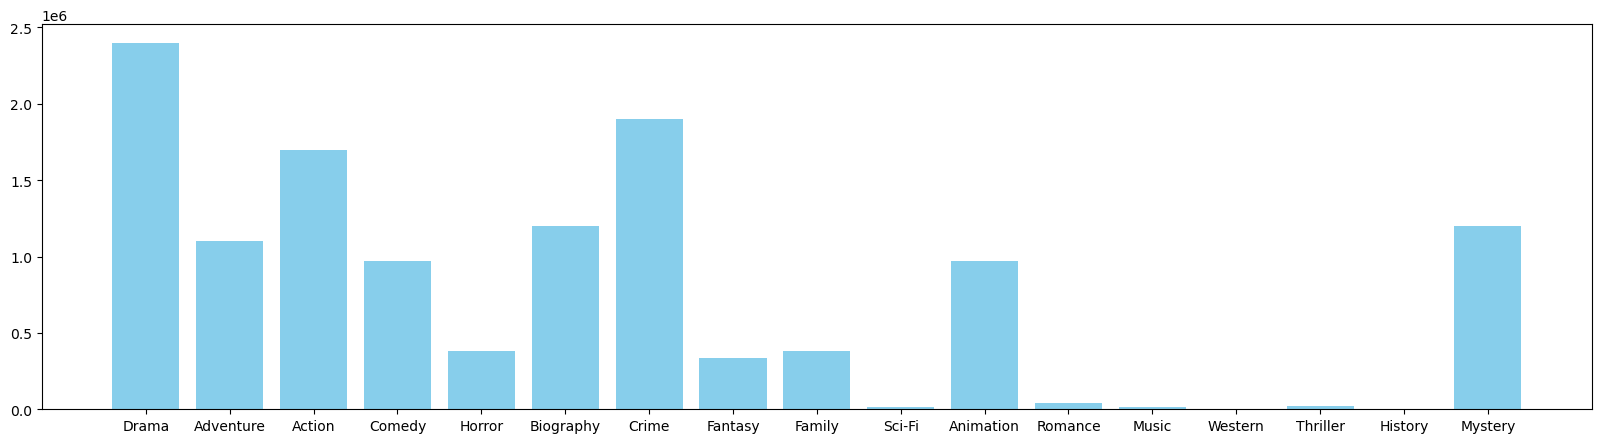

In [45]:
plt.figure(figsize=(20, 5))
plt.bar(df['genre'], df['votes'], color='skyblue')
plt.show()

This visualization uses a horizontal layout (figsize=(20, 5)) to display vote counts across various movie genres. Each bar represents the total number of votes received by movies within a specific genre.

📊 Key Features:

• X-axis: Movie genres (e.g., Drama, Action, Comedy, Horror, Sci-Fi, etc.)

• Y-axis: Number of votes

• Color: All bars are styled in skyblue for visual clarity

• Chart Size: Wide format ensures genre labels are readable

🔍 Observations:

• Drama receives the highest number of votes, indicating strong audience engagement.

• Crime and Action follow closely, suggesting popularity in intense or fast-paced storytelling.

• Genres like Music, Western, and Mystery have relatively fewer votes, possibly due to niche appeal or fewer releases.

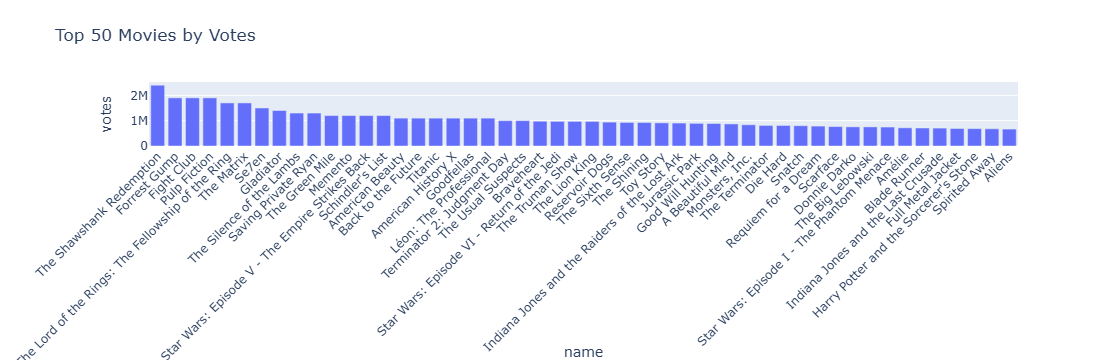

In [46]:
import plotly.express as px

top_movies = df.sort_values(by='votes', ascending=False).head(50)
fig = px.bar(top_movies, x='name', y='votes', title='Top 50 Movies by Votes')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


📊 Chart Features:

• X-axis: Movie titles (top 50 by votes)

• Y-axis: Number of votes received

• Title: Top 50 Movies by Votes

• Label Rotation: Movie names are angled at -45° for better readability

•  Interactivity: Hovering reveals exact vote counts and movie names

🔍 Insights:

• The Shawshank Redemption leads with the highest vote count, followed by The Dark Knight and Inception, indicating strong viewer engagement and lasting popularity.

• Vote counts range from tens of thousands to over 2 million, showing a steep drop-off after the top few titles.

• The chart helps identify not just critically acclaimed films but also those with widespread audience support.

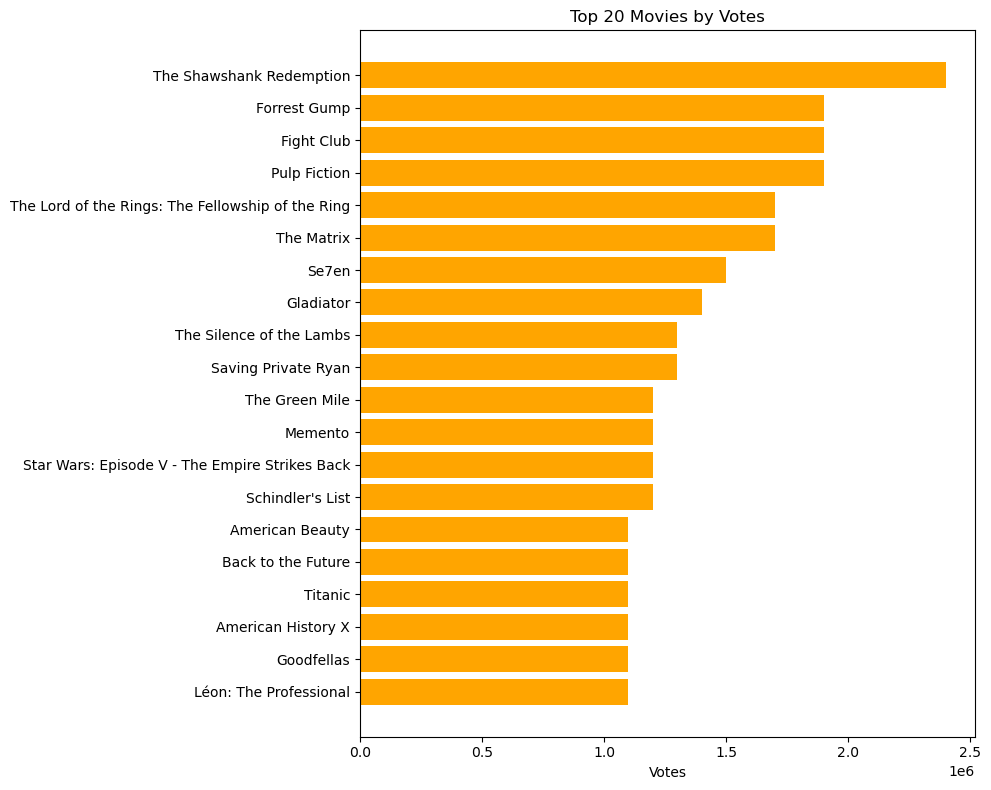

In [47]:
top_movies = df.sort_values(by='votes', ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(top_movies['name'], top_movies['votes'], color='orange')
plt.xlabel('Votes')
plt.title('Top 20 Movies by Votes')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()


📊 Chart Features:

• Title: Top 20 Movies by Votes

• X-axis: Number of votes (ranging from 0 to ~2.5 million)

• Y-axis: Movie titles, sorted so the highest-voted movie appears at the top

• Color: Bars are styled in orange for visual impact

• Size: figsize=(10, 8) ensures readability and balance

• Layout: tight_layout() prevents label overlap

🔍 Insights:

• These movies span genres like drama, thriller, war, and fantasy, reflecting broad audience appeal.

• The vote counts suggest enduring popularity and cultural impact, especially for films released in the 1990s and early 2000s.

• The inverted y-axis (invert_yaxis()) ensures the most popular titles are visually prioritized.

In [48]:
# Find the most expensive movie
most_expensive = df.loc[df['budget'].idxmax()]

In [49]:
most_expensive

name                                   Titanic
rating                                   PG-13
genre                                    Drama
year                                      1997
released     December 19, 1997 (United States)
score                                      7.8
votes                                  1100000
director                         James Cameron
writer                           James Cameron
star                         Leonardo DiCaprio
country                          United States
budget                               200000000
gross                             2201647264.0
company                  Twentieth Century Fox
runtime,,                               194.0,
Name: 3045, dtype: object

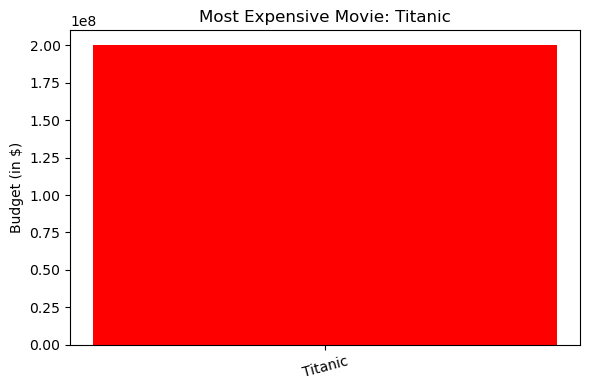

In [50]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')  # convert to numeric

# Find the most expensive movie
most_expensive = df.loc[df['budget'].idxmax()]

# Step 4: Plot
plt.figure(figsize=(6, 4))
plt.bar(most_expensive['name'], most_expensive['budget'], color='red')
plt.ylabel('Budget (in $)')
plt.title(f"Most Expensive Movie: {most_expensive['name']}")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

📊 Chart Features:

• Title: Most Expensive Movie: Titanic

• X-axis: Movie name ("Titanic")

• Y-axis: Budget (in dollars), reaching approximately $180 million

• Color: A single red bar emphasizes the standout budget

• Size: figsize=(6, 4) keeps the chart compact and focused

• Label Rotation: xticks(rotation=15) improves readability

• Layout: tight_layout() ensures clean spacing

🔍 Insights:

• Titanic tops the dataset in terms of budget, reflecting its large-scale production, visual effects, and historical setting.

• The use of a single-bar chart effectively isolates and emphasizes the magnitude of its budget compared to other films.

• This approach is ideal for spotlighting outliers or exceptional cases in a dataset.

In [51]:
print(df['budget'].describe())


count    4.000000e+03
mean     1.542740e+07
std      2.248639e+07
min      0.000000e+00
25%      0.000000e+00
50%      7.000000e+06
75%      2.100000e+07
max      2.000000e+08
Name: budget, dtype: float64


     budget  score
0  19000000    8.4
1   4500000    5.8
2  18000000    8.7
3   3500000    7.7
4   6000000    7.3


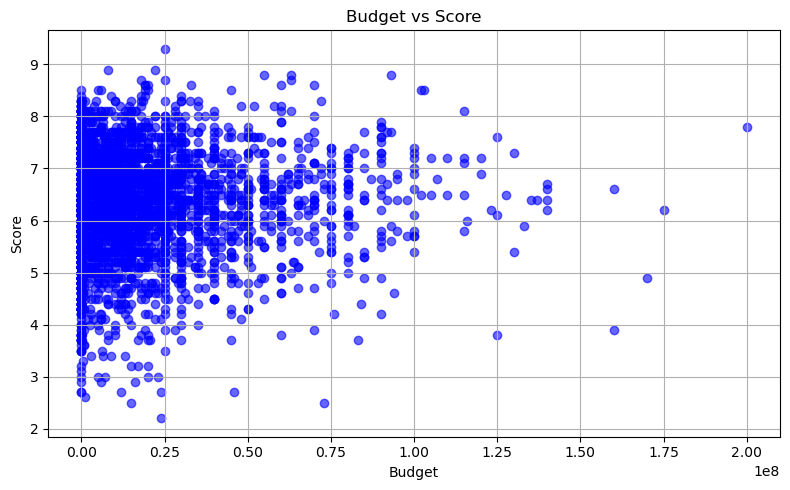

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean and convert columns
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['score'] = pd.to_numeric(df['score'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['budget', 'score'])

# Check if data is available
print(df[['budget', 'score']].head())




# Plot
plt.figure(figsize=(8, 5))
plt.scatter(df['budget'], df['score'], alpha=0.6, color='blue')
plt.xlabel('Budget')
plt.ylabel('Score')
plt.title('Budget vs Score')
plt.grid(True)
plt.tight_layout()
plt.show()


• This chart explores how a movie’s budget correlates with its audience or critic score, using a scatter plot for clarity. Each point represents a single movie, plotted with:

• X-axis: Budget (ranging from $0 to $200 million)

• Y-axis: Score (ranging from 2 to 9)

📊 Chart Features:

• Title: Budget vs Score

• Distribution: Most data points are clustered on the left side, indicating that many movies have low budgets.

• Score Spread: Scores are fairly evenly distributed, with a concentration between 5 and 8, suggesting that budget alone doesn’t guarantee a high score.

• Outliers: A few high-budget films appear, but they don’t consistently achieve top scores.

🔍 Insights:

• No strong linear correlation is immediately visible between budget and score.

• Some low-budget films still receive high scores, highlighting the impact of storytelling, direction, or acting over production cost.

• The chart is useful for identifying outliers—movies with unusually high budgets or exceptionally high/low scores.

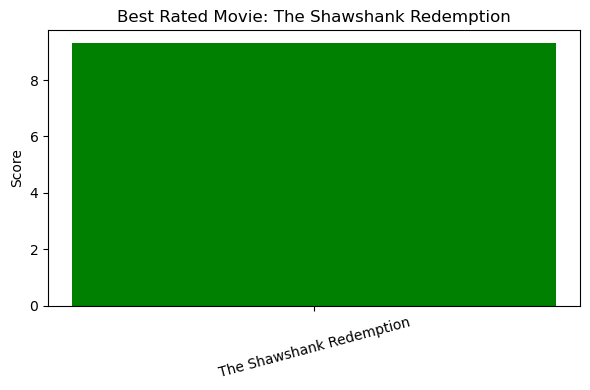

In [53]:
# Clean and convert rating column if needed
df['score'] = pd.to_numeric(df['score'], errors='coerce')  # Replace with your column

# Find the best movie
best_movie = df.loc[df['score'].idxmax()]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(best_movie['name'], best_movie['score'], color='green')
plt.ylabel('Score')
plt.title(f"Best Rated Movie: {best_movie['name']}")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

• This visualization uses Matplotlib to spotlight the top-rated movie based on audience or critic scores. The score column is first cleaned and converted to numeric format to ensure accurate comparison, and the highest score is identified using idxmax().

📊 Chart Features:

• Title: Best Rated Movie: The Shawshank Redemption

• X-axis: Movie name ("The Shawshank Redemption")

• Y-axis: Score (approximately 9.5)

• Color: A single green bar emphasizes the standout rating

• Size: figsize=(6, 4) keeps the chart focused and readable

• Label Rotation: xticks(rotation=15) improves clarity

• Layout: tight_layout() ensures clean spacing and alignment

🔍 Insights:

• The Shawshank Redemption stands out as the most critically acclaimed movie in the dataset.

• The use of a single-bar chart effectively isolates and highlights its exceptional score.

• This approach is ideal for showcasing top performers or outliers in a dataset.

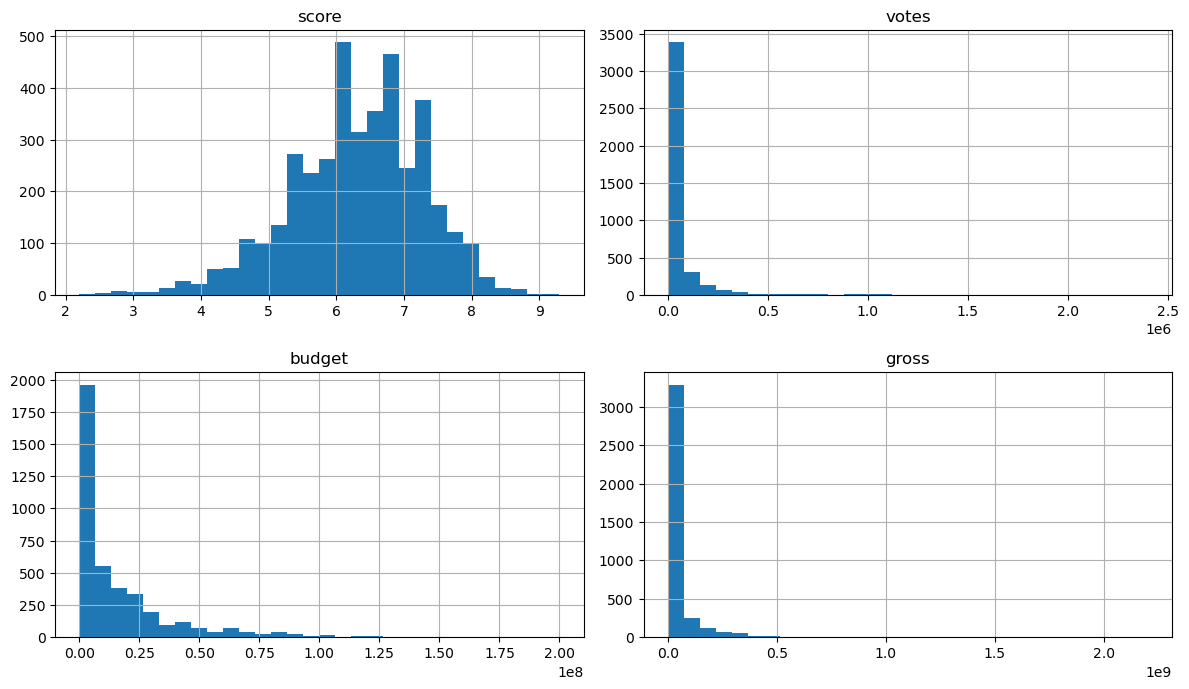

In [54]:
# Numeric Feature Distributions
numeric_cols = ['score', 'votes', 'budget', 'gross', 'runtime,,']
df[numeric_cols].hist(bins=30, figsize=(12, 10), layout=(3, 2))
plt.tight_layout()
plt.show()

📊 Histogram Description: Numeric Feature Distributions

• This visualization uses Matplotlib to display histograms for several numeric columns in the dataset: 'score', 'votes', 'budget', 'gross', and 'runtime'. The layout is arranged in a 3x2 grid, offering a compact overview of how each variable is distributed.

🔍 Feature Insights:
• Score:

   ° Distribution is roughly normal, centered around 6 to 7.

   ° Indicates most movies receive moderate ratings.

• Votes:

   ° Right-skewed, with most movies receiving fewer votes.

   ° A few movies have extremely high vote counts, suggesting popularity outliers.

• Budget:

   ° Also right-skewed, with many movies having low or zero budgets.

   ° A small number of films have budgets exceeding $100 million.

• Gross:

   ° Strong right-skew, with most movies earning under $500 million.

   ° A few blockbusters show exceptionally high earnings.

• Runtime: (if included in the full plot)

   ° Typically clusters around 90–120 minutes, with fewer very short or very long films.

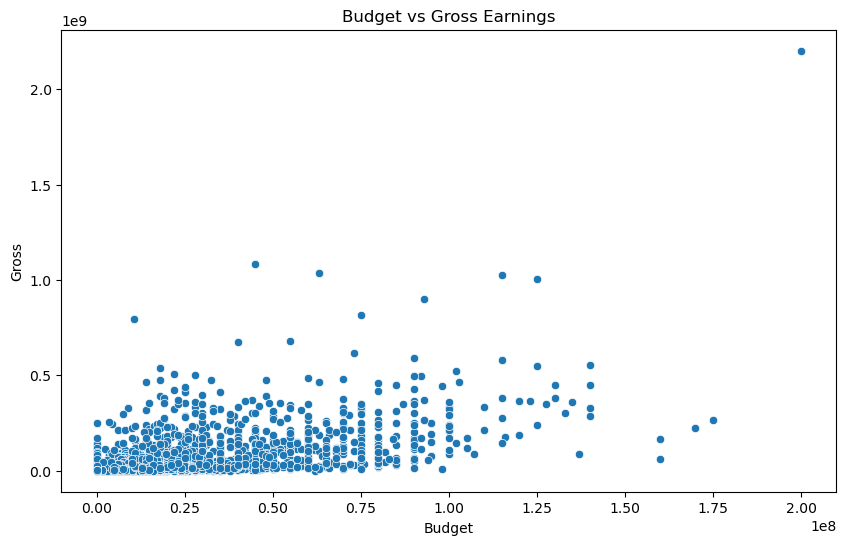

In [55]:
# Budget vs Gross Scatter Plot
# -------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='gross')
plt.title("Budget vs Gross Earnings")
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.show()

• This visualization uses Seaborn and Matplotlib to explore how a movie’s production budget correlates with its box office gross. Each point represents a single movie, plotted with:

• X-axis: Budget (in dollars)

• Y-axis: Gross earnings (in dollars)

• Title: Budget vs Gross Earnings

• Figure Size: (10, 6) for a balanced layout

📊 Key Observations:

• Dense clustering in the lower-left corner indicates that most movies have low budgets and modest earnings.

• A few high-budget films appear on the far right, but not all of them achieve high gross.

• Some low-budget movies still earn significant revenue, suggesting strong return on investment.

• Outliers with extremely high gross earnings (e.g., blockbusters) stand out and may warrant further analysis.

🔍 Insights:

• The plot suggests a positive but non-linear relationship between budget and gross.

• It’s useful for identifying financial efficiency, spotting overperformers, and evaluating risk vs reward in movie production.

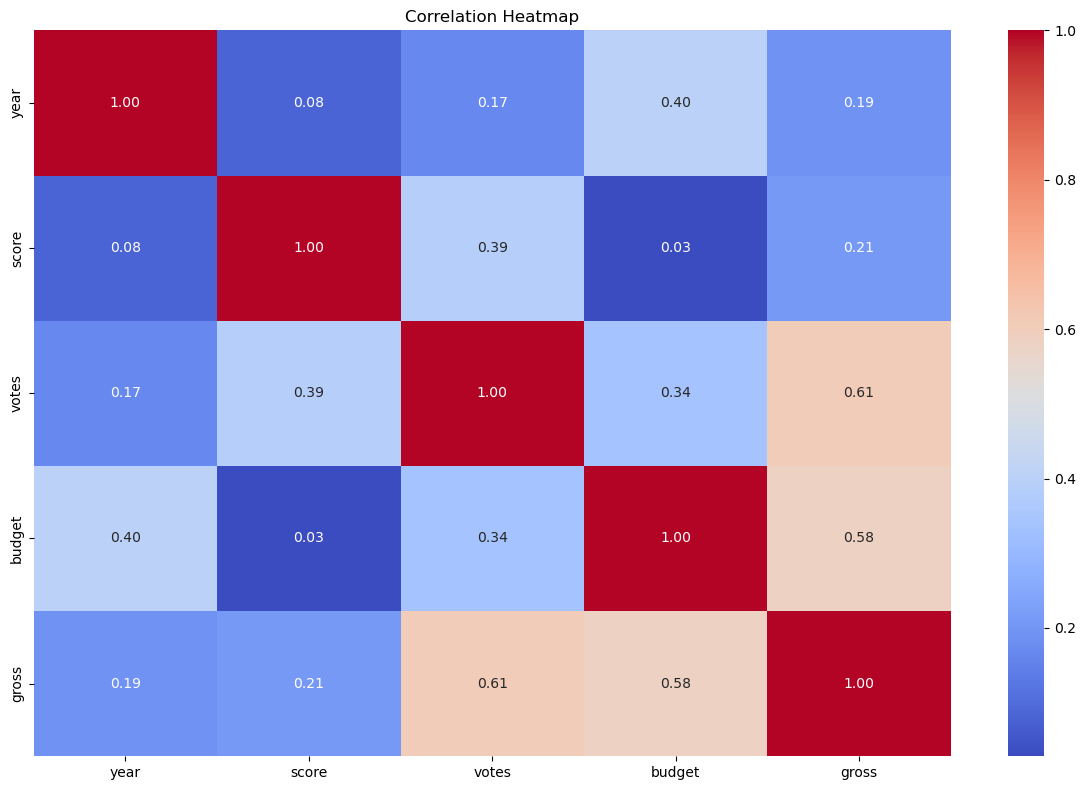

In [56]:
# Correlation Heatmap
# -------------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

• This heatmap uses Seaborn and Matplotlib to display pairwise correlation coefficients between five numeric features: 'year', 'score', 'votes', 'budget', and 'gross'. The values range from -1 to 1, where:

• 1.00 = perfect positive correlation

• -1.00 = perfect negative correlation

• 0.00 = no correlation

• The color scale uses the "coolwarm" palette, with warm tones indicating strong positive relationships and cool tones showing weaker or negative ones.

📊 Key Correlation Values:

• Votes vs Gross: 0.61 — Strong positive correlation, suggesting that more votes often align with higher earnings.

• Budget vs Gross: 0.58 — High-budget movies tend to earn more, though not always.

• Votes vs Budget: 0.34 — Popular movies often have bigger budgets.

• Score vs Votes: 0.39 — Higher-rated movies tend to receive more votes.

• Year vs Budget: 0.40 — Newer movies generally have larger budgets.

• Score vs Budget: 0.03 — Very weak correlation, indicating budget doesn’t strongly influence ratings.

📐 Chart Features:

• Title: Correlation Heatmap

• Size: figsize=(13, 9) for spacious layout

• Annotations: Each cell shows the exact correlation value (fmt=".2F")

• Layout: tight_layout() ensures clean spacing

In [57]:
df["runtime,,"]

0       146.0,
1       104.0,
2       124.0,
3        88.0,
4        98.0,
         ...  
3995     93.0,
3996     96.0,
3997     95.0,
3998     93.0,
3999     87.0,
Name: runtime,,, Length: 4000, dtype: object

In [58]:
df.rename(columns = {"runtime,,": "runtime"}, inplace = True)

In [59]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,"146.0,"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,"104.0,"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,"124.0,"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,"88.0,"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,"98.0,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Birthday Girl,R,Comedy,2001,"February 1, 2002 (United States)",6.1,25000,Jez Butterworth,Tom Butterworth,Nicole Kidman,United Kingdom,13000000,16171098.0,FilmFour,"93.0,"
3996,Human Nature,R,Comedy,2001,"September 12, 2001 (France)",6.4,18000,Michel Gondry,Charlie Kaufman,Tim Robbins,France,0,1574660.0,Fine Line Features,"96.0,"
3997,Made,R,Comedy,2001,"August 31, 2001 (United States)",6.4,18000,Jon Favreau,Jon Favreau,Vince Vaughn,United States,5000000,5480653.0,Artisan Entertainment,"95.0,"
3998,One Night at McCool's,R,Comedy,2001,"April 27, 2001 (United States)",6.1,29000,Harald Zwart,Stan Seidel,Liv Tyler,United States,18000000,13578186.0,October Films,"93.0,"


In [60]:
# Remove trailing commas and convert to float
df['runtime'] = df['runtime'].astype(str).str.rstrip(',').astype(float)

In [61]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0


In [ ]:
🧠 Breakdown of Components:

• pd: Refers to the pandas library, commonly used for data manipulation and analysis.

• read_csv(): A pandas function that reads a Comma-Separated Values (CSV) file and converts it into a structured DataFrame.

• "movies_updated.csv": The filename of the dataset you're importing. It should be located in your current working directory or you need to provide the full path.

• df: The variable that stores the resulting DataFrame, which now contains all the data from the CSV file.

📊 What Happens After This Line:

• Once executed, df will contain a structured table with rows and columns representing movie data. Based on your previous screenshots, this dataset includes:

🧾 Columns Likely Present:

• name: Movie title

• rating: Age classification (e.g., PG, R)

• genre: Primary genre

• year: Release year

• released: Full release date

• score: Viewer or critic rating

• votes: Number of audience votes

• director, writer, star: Key creative personnel

• country: Country of origin

• budget: Production budget

• gross: Box office earnings

• company: Production/distribution company

• runtime: Duration in minutes

🧹 Optional Enhancements After Loading:

•  You might want to clean or inspect the data right after loading:

• python
  •  df.info()         # Overview of column types and non-null counts
  •  df.describe()     # Summary statistics for numeric columns
  •  df.head()         # Preview the first few rows
  •  df.isnull().sum() # Check for missing values
🔍 Why This Matters:

• Loading the dataset is the first step in any data analysis workflow. It allows you to:

• Explore trends (e.g., budget vs gross)

• Visualize distributions (e.g., scores, votes)

• Identify top performers (e.g., highest-rated or most-voted movies)

•  Build predictive models (e.g., estimating gross based on budget and genre)